## M345SC 2019 Lab 6

### Task 1: Simulating random walks

The simplest representation of 1-D random walks can be expressed as: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). This can be implemented in Python in a straightforward manner in Python iterating forward in time and using np.random.choice to carry out the coin flip each step:

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Nt = 100 #number of iterations
x = np.zeros(Nt+1)

#1 Nt-step random walk
for i in range(Nt):
    x[i+1] = x[i] + np.random.choice((-1,1))

#Display walk
plt.figure()
plt.plot(x,'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("A single random walk")
plt.show()


<Figure size 640x480 with 1 Axes>

Ultimately, a single random walk has little meaning, and we need to compute averages over several walks: 

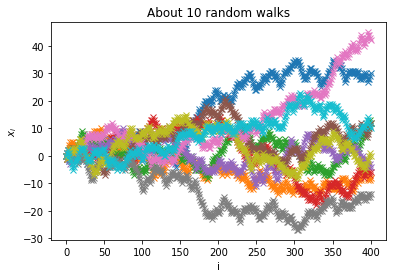

dt=1.601052


In [2]:
from time import time
import numpy as np
def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    for j in range(M):
        for i in range(Nt):
            x[i+1,j] = x[i,j] + np.random.choice((-1,1))

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk(display=True)
print("dt=%f" %out[1])

The function above is extremely inefficient for large M and Nt.
When working with arrays, it is essential to avoid loops and use built-in functions/methods whenever possible. Modify *rwalk* below so that it: 1) Pre-computes all needed random numbers and stores them in an array before computing the random walks and 2) the loop over M walks is removed and all M walks are simultaneously updated with each step of i:

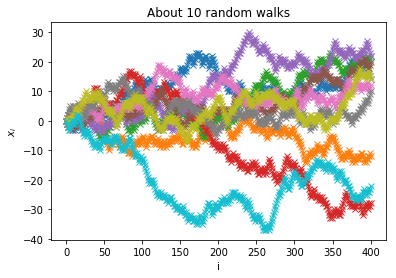

dt=0.006001


In [3]:
from time import time
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    
    #**Modify code below and add code here**
    walks = np.random.choice((-1,1),(Nt,M))
    for i in range(Nt):
        x[i+1,:] = x[i,:] + walks[i,:]
    #M Nt-step random walks
    #for j in range(M):
    #    for i in range(Nt):
    #        x[i+1,j] = x[i,j] + np.random.choice((-1,1))

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk2(display=True)
print("dt=%f" %out[1])

How much faster is your new function?

Now, compute the mean and standard deviation of $x_i$ across the M-samples. You should be able to compute this without using any loops, and you should find that the standard deviation increases as $\sqrt{i}$

In [8]:
mean = np.mean(out[0],axis= 1)
std = np.std(out[0],axis =1)

mean
std

array([ 0.        ,  0.999928  ,  1.38376877,  1.77747686,  2.06491065,
        2.30287125,  2.49717921,  2.68953528,  2.82515557,  3.00559478,
        3.18216027,  3.29396053,  3.48037699,  3.64665545,  3.80454255,
        3.87056792,  3.97190131,  4.07599019,  4.21361413,  4.26694082,
        4.388237  ,  4.51674042,  4.63507325,  4.68027179,  4.75898981,
        4.86522353,  4.94360354,  5.06037785,  5.20050921,  5.22976099,
        5.30128286,  5.36271424,  5.43831003,  5.51097233,  5.6524331 ,
        5.66713331,  5.76926338,  5.80943233,  5.85556692,  5.95244488,
        6.03586481,  6.15549316,  6.20928853,  6.23393936,  6.3038731 ,
        6.33051783,  6.27058658,  6.3401653 ,  6.44231511,  6.49594458,
        6.57438788,  6.70023164,  6.7902    ,  6.93755   ,  6.99802372,
        7.02040341,  7.13860939,  7.18941889,  7.21441224,  7.2789219 ,
        7.36043042,  7.36856458,  7.41779913,  7.45150079,  7.53892406,
        7.5834293 ,  7.70463133,  7.78284884,  7.88569946,  7.97

### Task 2: Practice with arrays, eigenvalues and eigenvectors

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [ ]:
import numpy as np
#Add code here

2) Compute the eigenvalues and eigenvectors of N:

In [ ]:
#Add code here

3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [ ]:
#Add code here


4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [ ]:
#Add code here